# Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from math import ceil, floor
%matplotlib inline

locale.setlocale(locale.LC_ALL, 'es_VE.UTF-8')

df = pd.read_csv('output.csv', sep=', ')

def plot_algorithms(df, values, variable, y, title, ylabel, logarithmic=False, zoom=False):
    _, axs = plt.subplots(1, len(values), figsize=(len(values)**2, len(values)))

    for i, value in enumerate(values):
        df_var = df[df[variable] == value]
        df_var = df_var.sort_values('Algorithm')
        results = df_var.groupby('Algorithm')[y].mean().reset_index()

        

        ax = sns.barplot(x='Algorithm', y=y, data=results, ax=axs[i])
        ax.set_title(title + ' ' + locale.format_string("%d", value, grouping=True))
        ax.set_xlabel('Algoritmo')
        ax.set_ylabel(ylabel)
        ax.set_xticks(range(len(results['Algorithm'])))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

        # Change the color of DP algorithm
        if df_var['Algorithm'].str.contains('DP').any():
            ax.patches[0].set_facecolor('g')

        if logarithmic:
            ax.set_yscale('log')

        if zoom:
            ax.set_ylim([floor(df_var[y].min()), ceil(df_var[y].max())])

    plt.tight_layout()
    plt.show()

In [2]:
df.head()

,Instance,Algorithm,Correlation,Size,Capacity,Expected,Obtained,Error,Time (ms)
0,knapPI_1_100_10000_100,KNAPSACK_HEURISTICS,uncorrelated,100,500453,504541,504541,0,16
1,knapPI_1_1000_10000_100,KNAPSACK_HEURISTICS,uncorrelated,1000,4881651,4961864,4942158,19706,31
2,knapPI_1_10000_10000_100,KNAPSACK_HEURISTICS,uncorrelated,10000,49805376,50106947,49886890,220057,297
3,knapPI_1_100_10000_100,KNAPSACK_DP,uncorrelated,100,500453,504541,504541,0,353
4,knapPI_1_100_10000_100,KNAPSACK_LOCAL_SEARCH_SWAP,uncorrelated,100,500453,504541,504541,0,382


In [3]:
df[df['Obtained'] == -1]

,Instance,Algorithm,Correlation,Size,Capacity,Expected,Obtained,Error,Time (ms)
71,knapPI_1_10000_10000_100,KNAPSACK_DP,uncorrelated,10000,49805376,50106947,-1,50106948,9223372036854775807
73,knapPI_6_10000_10000_100,KNAPSACK_DP,subset sum,10000,49576995,49576995,-1,49576996,9223372036854775807
82,knapPI_6_1000_10000_100,KNAPSACK_GRASP,subset sum,1000,4788354,4788354,-1,4788355,9223372036854775807
83,knapPI_6_5000_10000_100,KNAPSACK_DP,subset sum,5000,24642572,24642572,-1,24642573,9223372036854775807
111,knapPI_1_5000_10000_100,KNAPSACK_DP,uncorrelated,5000,24764954,25058087,-1,25058088,9223372036854775807
116,knapPI_2_10000_10000_100,KNAPSACK_DP,weakly correlated,10000,49805376,50229348,-1,50229349,9223372036854775807
131,knapPI_2_5000_10000_100,KNAPSACK_DP,weakly correlated,5000,24764954,24994675,-1,24994676,9223372036854775807
139,knapPI_3_10000_10000_100,KNAPSACK_DP,strongly correlated,10000,49576995,59526995,-1,59526996,9223372036854775807
161,knapPI_3_5000_10000_100,KNAPSACK_DP,strongly correlated,5000,24642572,29617572,-1,29617573,9223372036854775807
169,knapPI_4_10000_10000_100,KNAPSACK_DP,inverse strongly correlated,10000,59477985,49958985,-1,49958986,9223372036854775807


In [4]:
df = df[df['Obtained'] != -1]

In [5]:
df['Accuracy (%)'] = df['Obtained'] / df['Expected'] * 100

# Analisis por numero de items

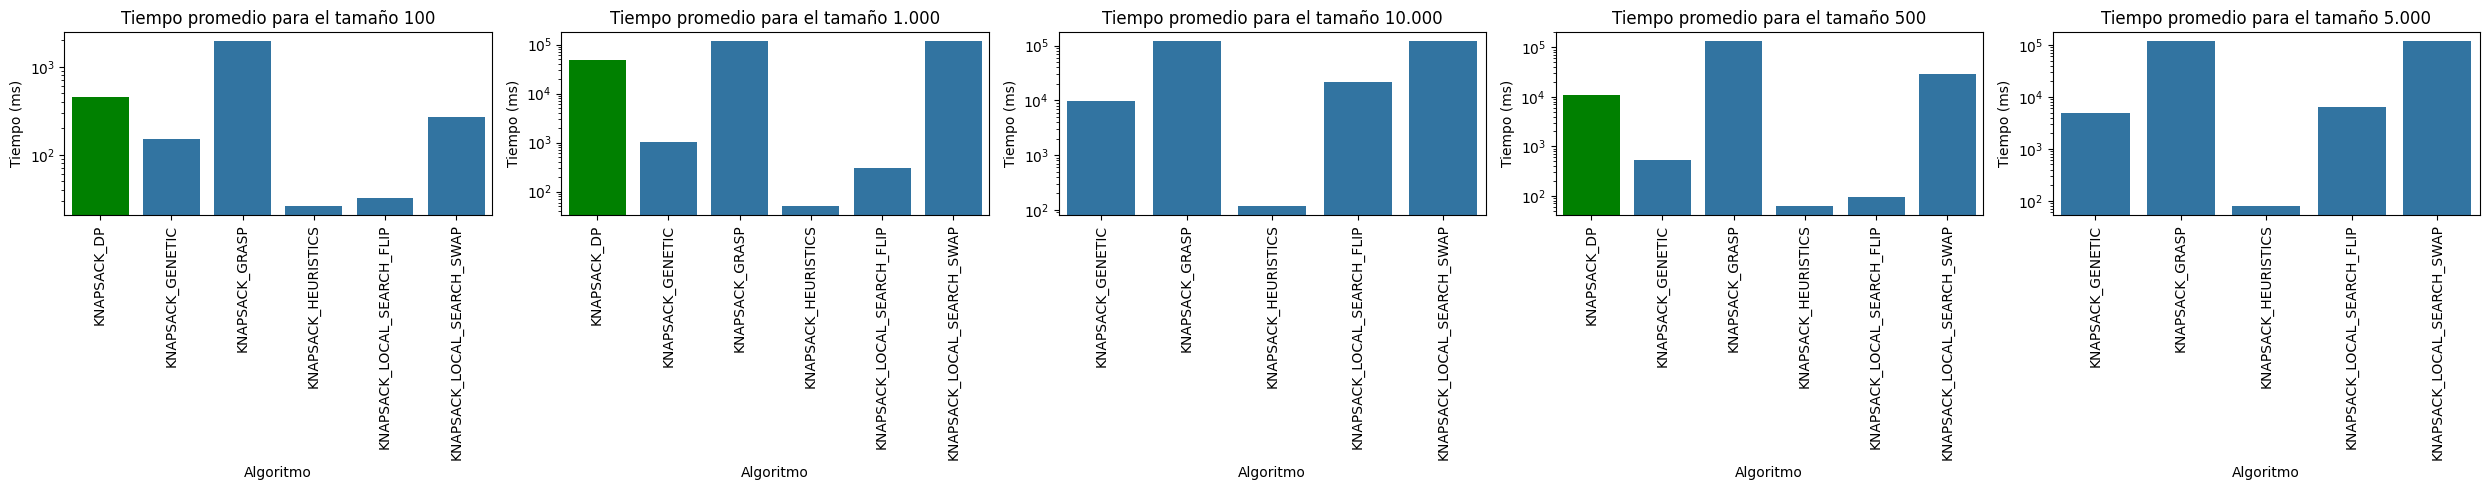

In [6]:
plot_algorithms(df, df['Size'].unique(), 'Size', 'Time (ms)', 'Tiempo promedio para el tamaño', 'Tiempo (ms)', logarithmic=True)

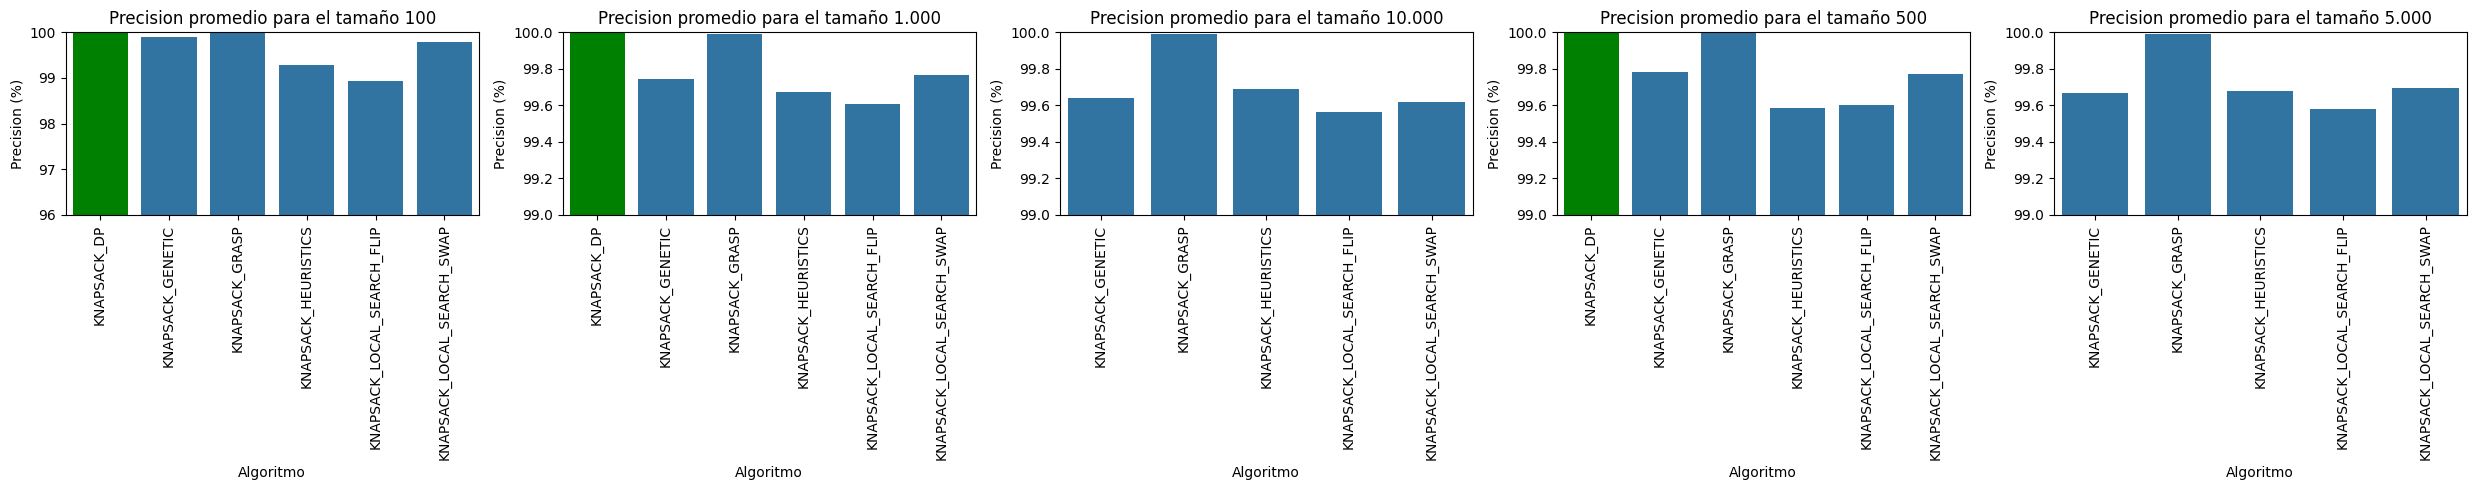

In [7]:
plot_algorithms(df, df['Size'].unique(), 'Size', 'Accuracy (%)', 'Precision promedio para el tamaño', 'Precision (%)', zoom=True)

In [8]:
(df[df['Algorithm'] == 'KNAPSACK_GRASP']['Obtained'] / df[df['Algorithm'] == 'KNAPSACK_GRASP']['Expected'] * 100).mean()

99.99469742429366

# Analisis por capacidad de la mochila

In [9]:
sorted_capacity = np.sort(df['Capacity'].unique())
capacities1 = sorted_capacity[:len(sorted_capacity)//3]
capacities2 = sorted_capacity[len(sorted_capacity)//3:2*len(sorted_capacity)//3]
capacities3 = sorted_capacity[2*len(sorted_capacity)//3:]

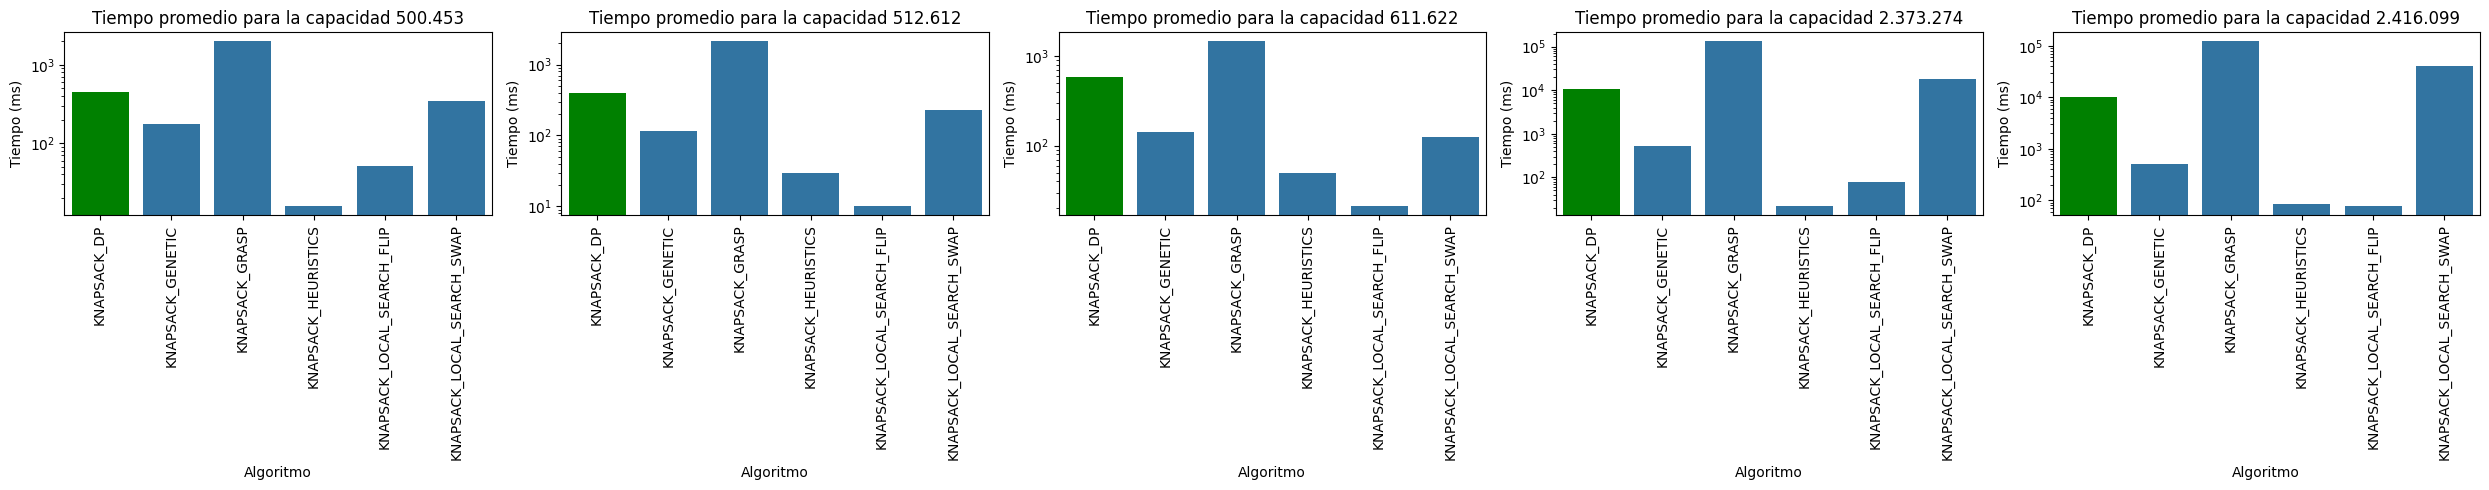

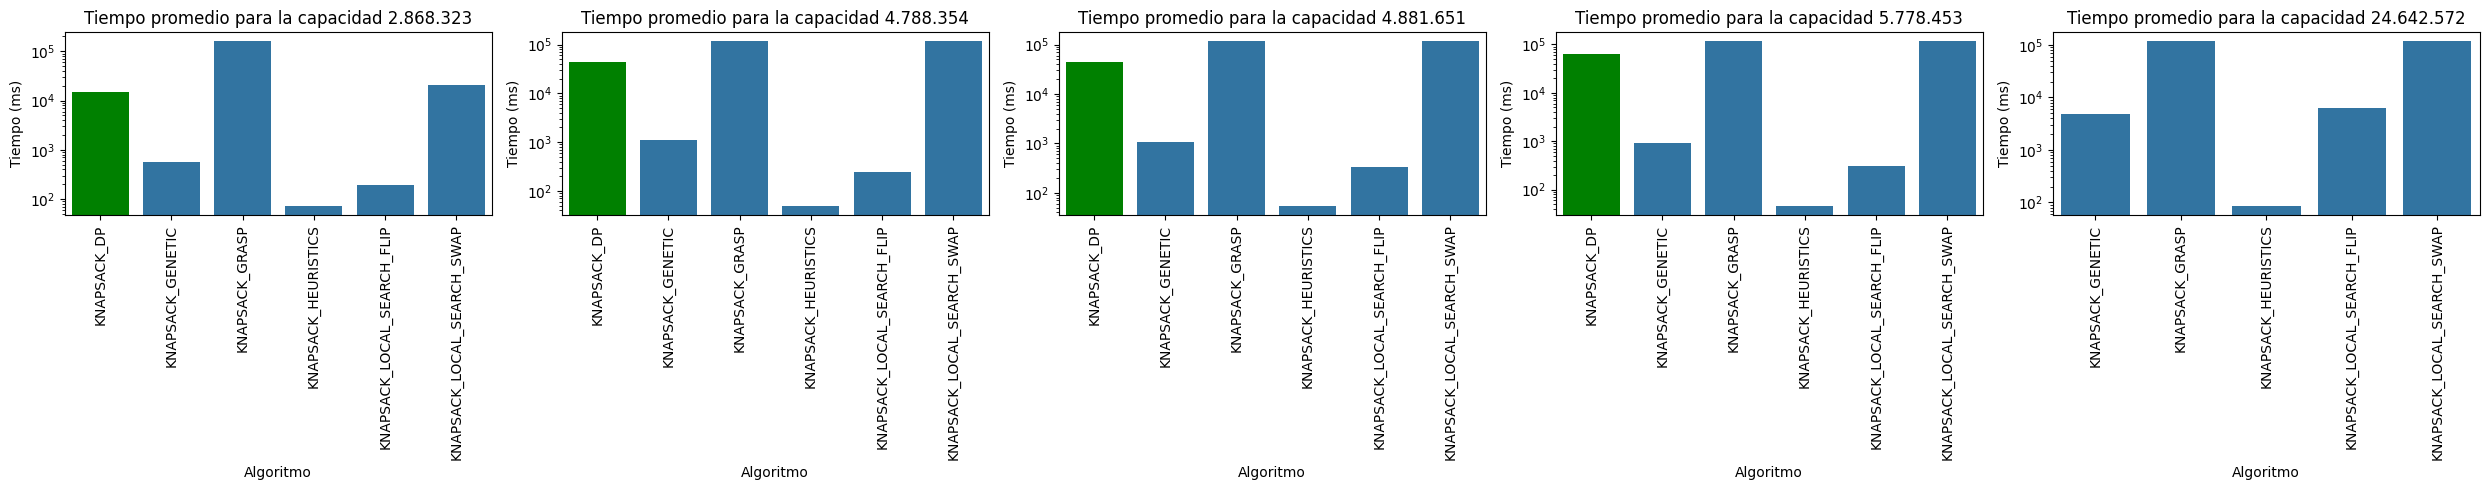

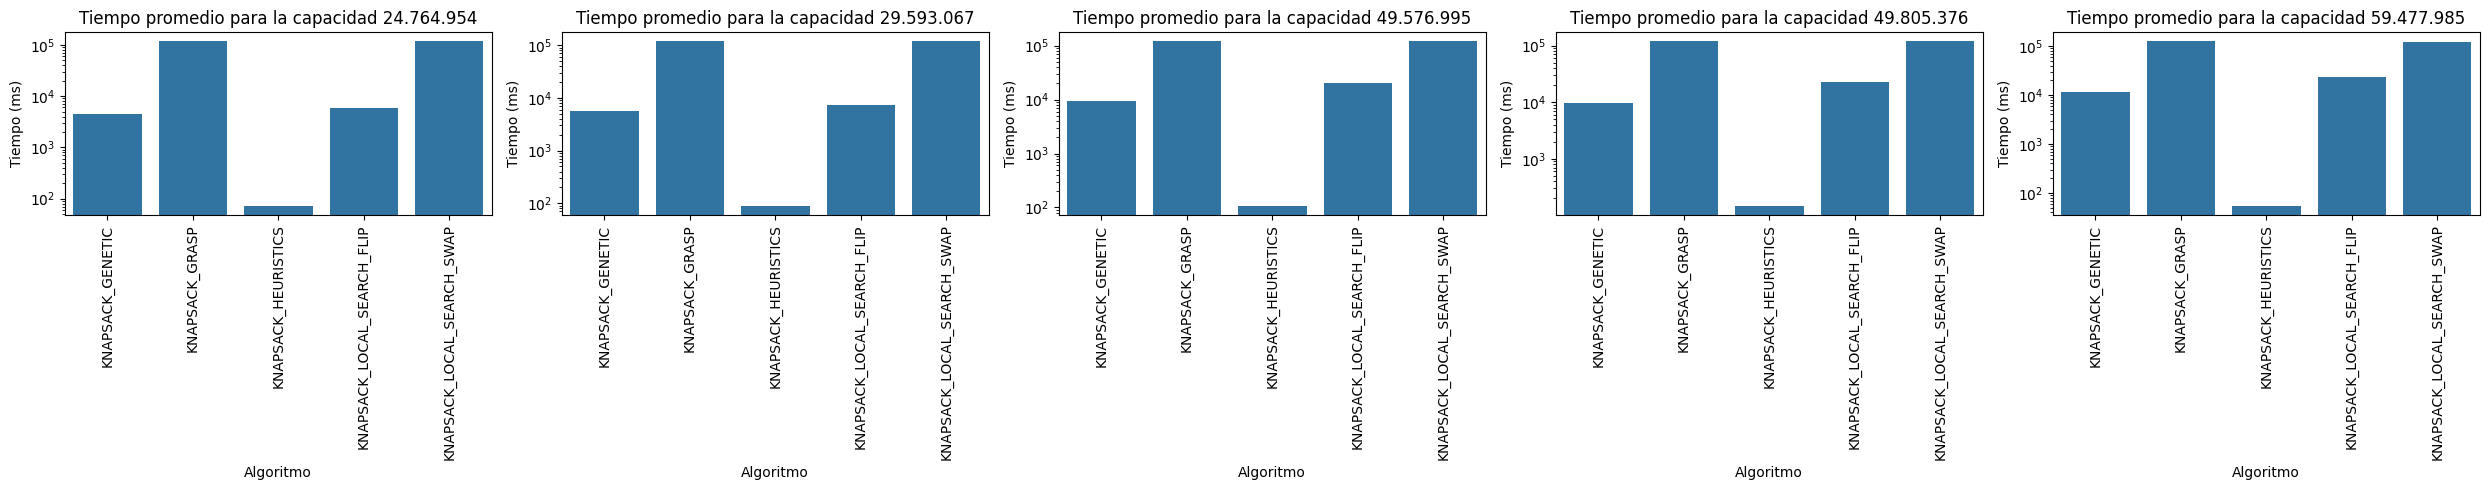

In [10]:
plot_algorithms(df, capacities1, 'Capacity', 'Time (ms)', 'Tiempo promedio para la capacidad', 'Tiempo (ms)', logarithmic=True)
plot_algorithms(df, capacities2, 'Capacity', 'Time (ms)', 'Tiempo promedio para la capacidad', 'Tiempo (ms)', logarithmic=True)
plot_algorithms(df, capacities3, 'Capacity', 'Time (ms)', 'Tiempo promedio para la capacidad', 'Tiempo (ms)', logarithmic=True)

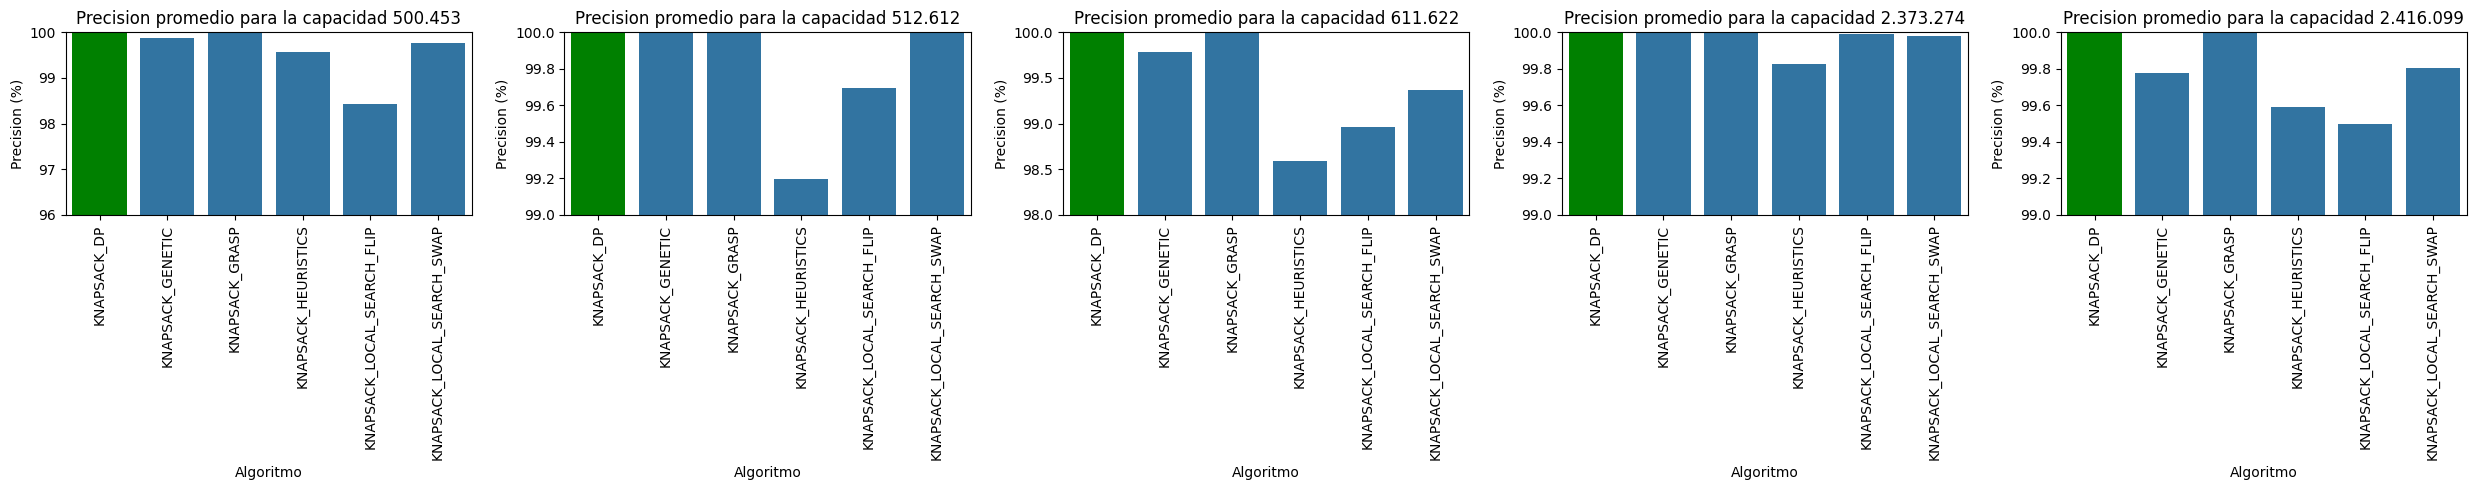

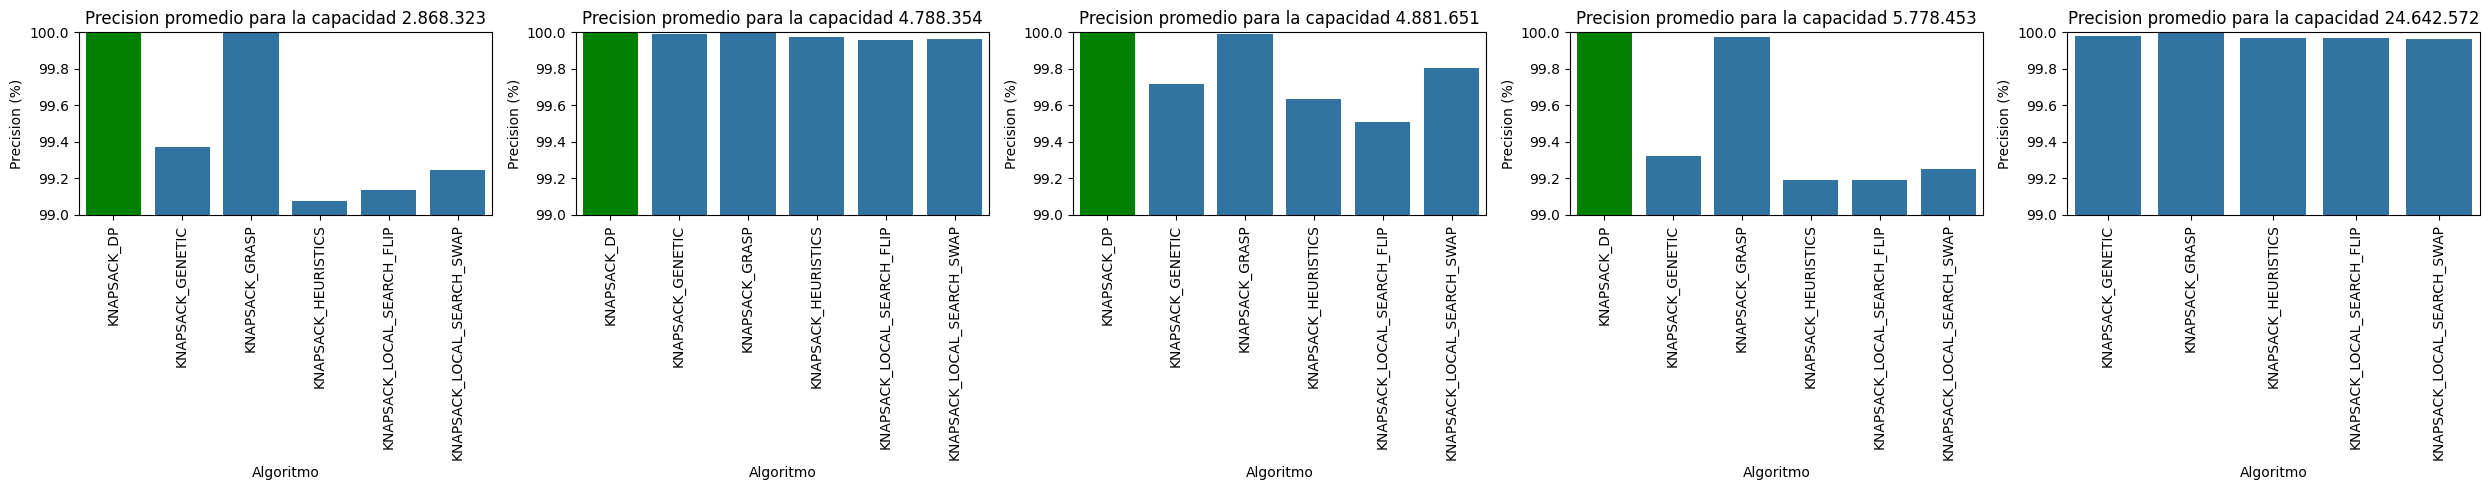

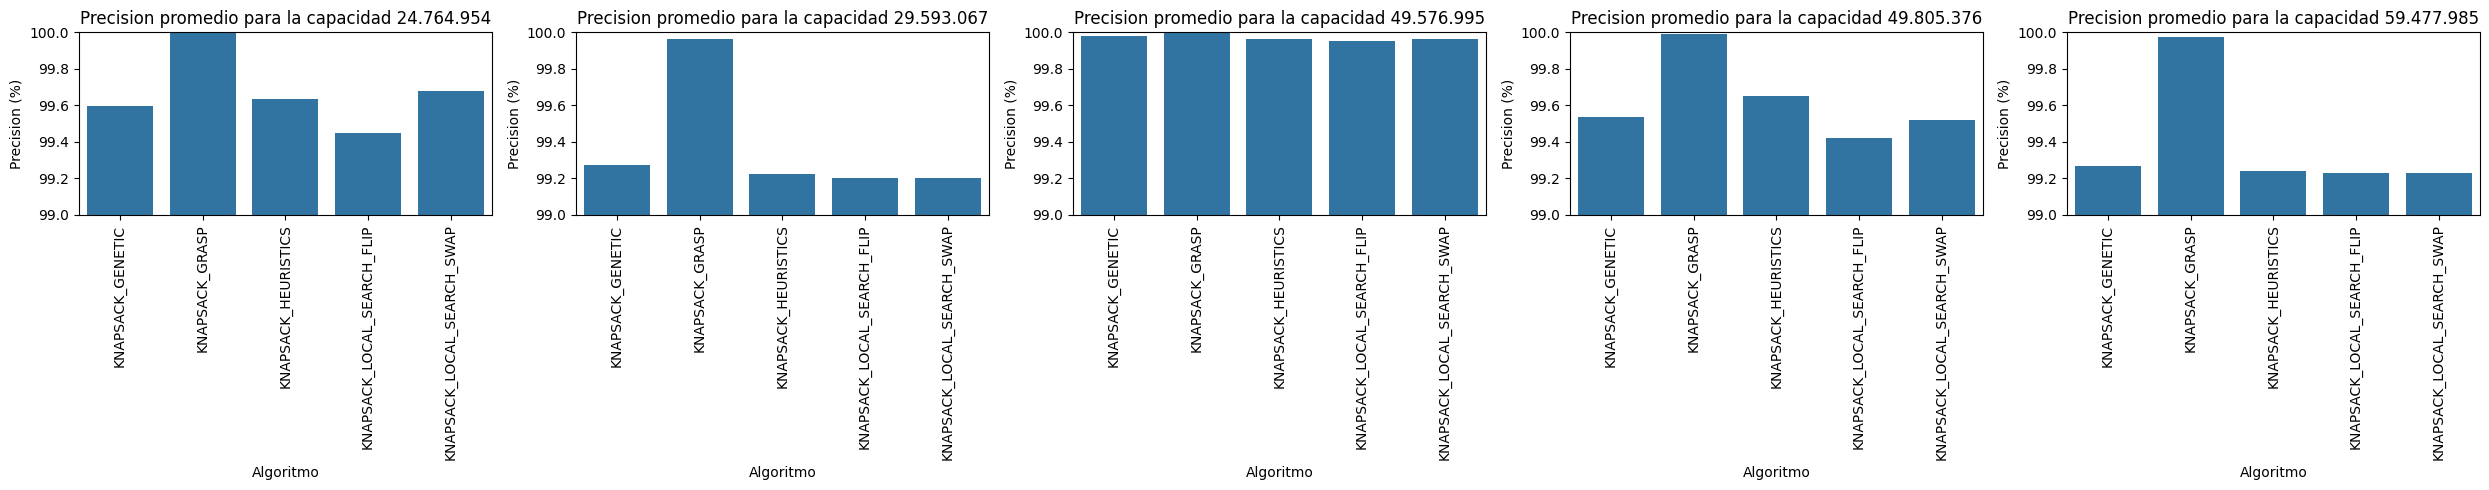

In [11]:
plot_algorithms(df, capacities1, 'Capacity', 'Accuracy (%)', 'Precision promedio para la capacidad', 'Precision (%)', zoom=True)
plot_algorithms(df, capacities2, 'Capacity', 'Accuracy (%)', 'Precision promedio para la capacidad', 'Precision (%)', zoom=True)
plot_algorithms(df, capacities3, 'Capacity', 'Accuracy (%)', 'Precision promedio para la capacidad', 'Precision (%)', zoom=True)